In [1]:
import numpy as np
import tqdm 
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib import colors
import matplotlib as mpl 
import astropy.units as u
from astropy.constants import G, M_sun
import sys

sys.path.append('../my_funcs/')
from pipeline_main import pipeline, dist
from pipeline_2D import to_osyris_ivs, to_osyris_ivs_old



# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)


### $$ Q = \frac{c_s\Omega}{\pi G\Sigma} \geq 1\;\Rightarrow\; Stable$$

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4855/4855 [00:30<00:00, 158.24it/s]


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4855/4855 [00:17<00:00, 277.17it/s]


Converged mean angular momentum vector after 0 iteration(s)
Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4855/4855 [00:00<00:00, 6418.93it/s]


Disk size: 145.1 au


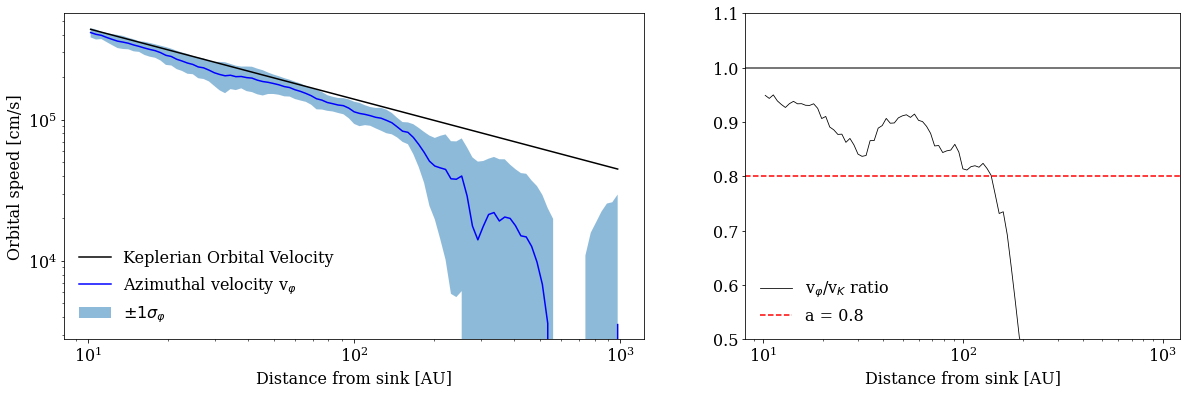

In [2]:
#datai = pipeline(snap = 223, run = 'goodold13', sink_id=13)
#data = pipeline(snap = 281, run = 'goodold13', sink_id=13)

#datai = pipeline(snap = 213, run = 'sink24core02', sink_id=24)
#data = pipeline(snap = 256, run = 'sink24core02', sink_id=24)

datai = pipeline(snap = 404, run = 'sink178core03', sink_id=178)
data = pipeline(snap = 535, run = 'sink178core03', sink_id=178)

#datai = pipeline(snap = 446, run = 'sink225core03', sink_id=225)
#data = pipeline(snap = 555, run = 'sink225core03', sink_id=225)

#datai = pipeline(snap = 342, run = 'sink122core02', sink_id=122)
#data = pipeline(snap = 463, run = 'sink122core02', sink_id=122)

#datai = pipeline(snap = 402, run = 'sink161core01', sink_id=161)
#data = pipeline(snap = 556, run = 'sink161core01', sink_id=161)

#datai = pipeline(snap = 236, run = 'sink80core01', sink_id=80)
#data = pipeline(snap = 341, run = 'sink80core01', sink_id=80)

#data = pipeline(snap = 177, run = 'sink13amr01', sink_id=13)
#data = pipeline(snap = 214, run = 'sink13core02', sink_id=13)

#datai = pipeline(snap = 213, run = 'sink24core02', sink_id=24)
#ata = pipeline(snap = 255, run = 'sink24core02', sink_id=24)

#datai = pipeline(snap = 159, run = 'sink6core01', sink_id=6)
#data = pipeline(snap = 159, run = 'sink6amr01', sink_id=6)

#datai = pipeline(snap = 342, run = 'sink122core02', sink_id=122, data = '/lustre/astro/buks/dispatch_experiments/ISM/data/')
#data = pipeline(snap = 389, run = 'sink122core02', sink_id=122, data = '/lustre/astro/buks/dispatch_experiments/ISM/data')
data.recalc_L(verbose = 1); #print(data.time - datai.time)
data.calc_disksize()

# Initially i plot the soundspeed $c_s$

In [3]:
data.M_star / M_sun

<Quantity 0.22058311>

In [4]:
for p in tqdm.tqdm(data.sn.patches):
    p.c_s = np.sqrt(p.γ * p.P / p.var('d'))
    p.Ω = p.vφ / p.cyl_R

  0%|          | 0/4855 [00:00<?, ?it/s]

100%|██████████| 4855/4855 [00:10<00:00, 455.68it/s]


In [5]:
res = 400; width = 1000 
variable = ['d', 'c_s', 'Ω']
data.to_osyris_ivs_old(variables=variable, view = width, resolution=res)#, dz = width, viewpoint=np.cross(data.L, np.array([0,0,1])))


Looping over DISPATCH data to extract data at highest level


  0%|          | 0/3176 [00:00<?, ?it/s]

100%|██████████| 3176/3176 [00:19<00:00, 162.42it/s]


Setting up Osyris data structure


/groups/astro/kxm508/.local/lib/python3.8/site-packages/numpy/ma/core.py:711: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.array(a, copy=False, subok=subok)


In [5]:
res = 400; width = 1000 
variable = ['d', 'c_s', 'Ω']
data.to_osyris_ivs(variables=variable, data_name = 'face_on', view = width, resolution=res)#, dz = width, viewpoint=np.cross(data.L, np.array([0,0,1])))


Looping over DISPATCH data to extract data at highest level


  0%|          | 0/3176 [00:00<?, ?it/s]

100%|██████████| 3176/3176 [00:31<00:00, 100.22it/s]


Setting up Osyris data structure


/groups/astro/kxm508/.local/lib/python3.8/site-packages/numpy/ma/core.py:711: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.array(a, copy=False, subok=subok)


In [ ]:
dz_cm = 20 * data.sn.cgs.au; print(dz_cm)

299200000000000.0


In [ ]:
cell_size =  (width / res)**2
cell_size

6.25

In [ ]:
Σ = data.osyris_ivs[0] * data.cgs_density  
c_s = data.osyris_ivs[1] * data.cms_velocity
Ω = data.osyris_ivs[2] / data.sn.scaling.t

In [6]:
Σ = data.osyris_ivs[0] * data.cgs_density  
c_s = data.osyris_ivs[1] * data.cms_velocity
Ω = data.osyris_ivs[2] / data.sn.scaling.t

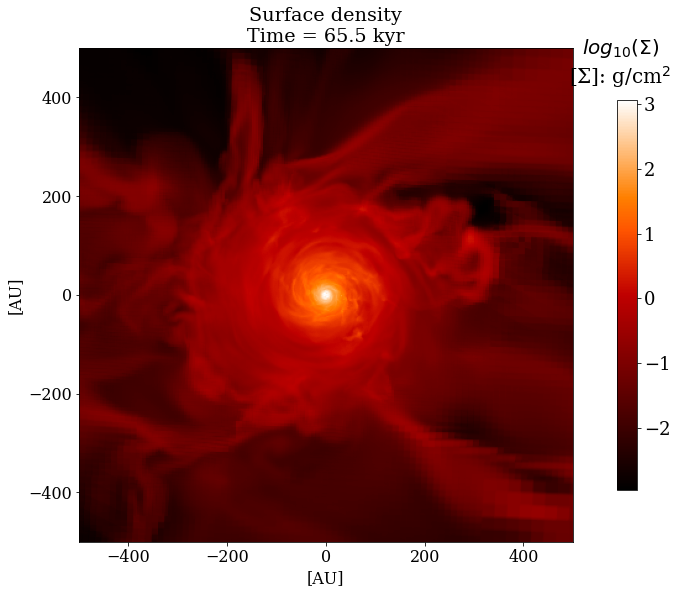

In [7]:
fig, axs = plt.subplots(figsize = (10, 10))
ext = width // 2
cs = axs.imshow(np.log10(Σ), extent = (-ext, ext, -ext, ext), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'Surface density\nTime = {(data.time - datai.time)/1e3:2.1f} kyr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

In [ ]:
data.M_star / M_sun

<Quantity 0.22058311>

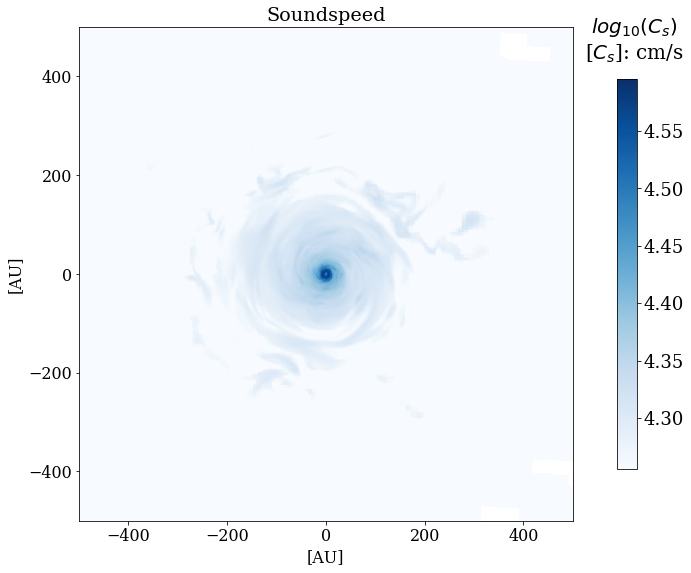

In [ ]:
fig, axs = plt.subplots(figsize = (10,10))
cs = axs.imshow(np.log10(c_s), extent = (-ext, ext, -ext, ext), origin ='lower', cmap = 'Blues')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(C_s)$\n[$C_s$]: cm/s', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Soundspeed', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)



/tmp/ipykernel_2142506/2983093234.py:2: RuntimeWarning: invalid value encountered in log10
  cs = axs.imshow(np.log10(Ω), extent = (-ext, ext, -ext, ext), origin ='lower', cmap = 'YlOrRd')


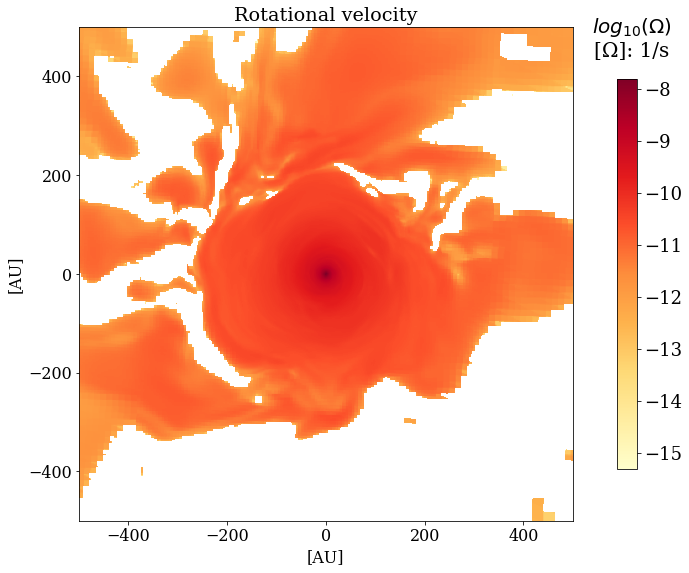

In [ ]:
fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(Ω), extent = (-ext, ext, -ext, ext), origin ='lower', cmap = 'YlOrRd')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Ω)$\n[Ω]: 1/s', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Rotational velocity', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

## $$[Ω]:\frac{1}{s}$$

# Calculate Toomre Q parameter without magnetic fields
### $$ Q = \frac{c_s\Omega}{\pi G\Sigma} \geq 1\;\Rightarrow\; Stable$$
### $$σ_Q^2 = \frac{1}{(\pi G)^2}\left[σ_{c_s}^2\left(\frac{\Omega}{\Sigma}\right)^2 + σ_\Omega^2\left(\frac{c_s}{\Sigma}\right)^2 + σ^2_\Sigma\left(-\frac{c_s\Omega}{\Sigma}\right)^2\right]$$

In [ ]:
G_cgs = G.to('cm**3 / (g *s**2)').value; print(G_cgs)
Q = (c_s * Ω) / (np.pi * G_cgs * Σ)

X, Y = np.linspace(-width //2 ,width //2,res), np.linspace(-width //2, width //2,res)


xx, yy = np.meshgrid(X, Y)
xx.shape, Q.shape

6.674299999999998e-08


((400, 400), (400, 400))

/tmp/ipykernel_2142506/2044594796.py:2: RuntimeWarning: invalid value encountered in log10
  cs = axs.imshow(np.log10(Q), extent = (-ext, ext, -ext, ext), origin ='lower', cmap = 'RdYlGn', vmin = -2, vmax = 2)
/tmp/ipykernel_2142506/2044594796.py:3: RuntimeWarning: invalid value encountered in log10
  ct = axs.contour(xx, yy, np.log10(Q), [np.log10(1), np.log10(2)], colors = ['black', 'red'])
/tmp/ipykernel_2142506/2044594796.py:3: UserWarning: No contour levels were found within the data range.
  ct = axs.contour(xx, yy, np.log10(Q), [np.log10(1), np.log10(2)], colors = ['black', 'red'])


IndexError: list index out of range

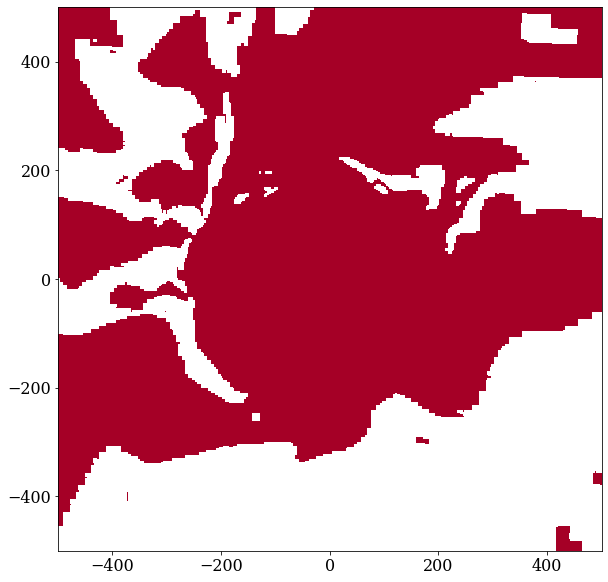

In [ ]:
fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(Q), extent = (-ext, ext, -ext, ext), origin ='lower', cmap = 'RdYlGn', vmin = -2, vmax = 2)
ct = axs.contour(xx, yy, np.log10(Q), [np.log10(1), np.log10(2)], colors = ['black', 'red'])
contour_labels = ['Q = 1', 'Q = 2']
for i in range(len(contour_labels)):
    ct.collections[i].set_label(contour_labels[i])

cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Q)$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Toomre Q parameter', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)
plt.legend(loc = 'lower left')

In [ ]:
np.sum((data.star_pos - np.array([-0.18159404,0.24889234,0.45780638]))**2)**0.5 * data.au_length

580970.8246350919